# Programación dinámica y la ecuación de Bellman

## ¿Qué es la programación dinámica?

Es una técnica para resolver cierto tipo de problemas más eficientemente. 

En la práctica, esto se traduce a diseñar algoritmos con ciertas características, que resuelven el problema.

Por ejemplo, considera la sucesión de Fibonacci: $0, 1, 1, 2, 3, 5, 8, ...$

Existe una fórmula recursiva para el cálculo del n-ésimo número:

$$
F(n) = 
\begin{cases}
0, & \text{si } n = 0, \\
1, & \text{si } n = 1, \\
F(n-1) + F(n-2), & \text{si } n > 1.
\end{cases}
$$


Para cálcular $F(4)$:

```
               F(4)
              /    \
          F(3)      F(2)
         /   \      /   \
     F(2)   F(1)  F(1)  F(0)
    /   \
 F(1)   F(0)
``` 


Una implementación recursiva simple recalcula los mismos subproblemas muchas veces, mientras que **programación dinámica** evita esta redundancia almacenando resultados intermedios.

Ganamos en cuanto complejidad, pasamos de realizar cálculos de manera exponencial a realizarlos de manera polinómica. 

## Principio de optimalidad de Bellman

> "Una política óptima tiene la propiedad de que, cualquiera que sea el estado inicial y la decisión inicial, las decisiones restantes deben constituir una política óptima respecto al estado que resulta de la primera decisión". [1957] 

(Si una solución es óptima, entonces todas sus subsoluciones también deben ser óptimas).

Para que un problema sea resoluble con programación dinámica, se requieren:

- Problemas superpuestos
- Subestructura óptima (Principio de optimalidad)

## ¿Por qué ver programación dinámica?

Aparte de su utilidad, sirve como preludio a Aprendizaje por Refuerzo:
- estados (x)
- acciones disponibles en un estado (a)

## Formulación

Sea $F(x,a)$ el costo de tomar la acción $a$ estando en el estado $x$. Entonces, el costo total de un estado se puede expresar como:
    
$$V(x_0) = \min_{{\{a_k}\}_{k=0}^N} \sum_{k=0}^N F(x_k, a_k)$$

Ahora, podemos separar el primer paso de los demás. Esto es equivalente al principio de optimalidad de Bellman.

$$ V(x_0) = \min_{a_0} ( F(x_0, a_0) + \min_{{\{a_k}\}_{k=1}^N} \sum_{k=1}^N F(x_k, a_k))$$

Notamos que esto se trata de una ecuación recursiva:
$$ V(x_0) = \min_{a_0} ( F(x_0, a_0) + V(x_1) ),$$
la cual puede ser resuelta usando programación dinámica

Para nuestro algoritmo:

1. Comience en el punto final deseado.
2. Realice todas las acciones posibles en el punto final, registrando su costo.
3. Para los estados resultantes de las acciones realizadas, vuelva a realizar todas las acciones.
4. Si se puede alcanzar un estado mediante más de una secuencia de acciones, elija la secuencia de acciones con el menor costo.
5. Repita el proceso hasta que se alcance el estado inicial mediante una secuencia de acciones (cuyo costo sea menor que cualquier otra secuencia de acciones que pueda alcanzar el estado inicial).

## Ruta óptima

### Generación de terreno

In [19]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import math

Resolvamos el problema de calcular el camino más corto a través de un terreno montañoso. Generaremos el terreno mediante una suma de gaussianos.

In [20]:
# Modelo de terreno
def terrain(x):
    peaks = [# center, height, sigma
             ((0.3,0.4), 2, 0.1),
             ((1.0,0.0), 1, 0.1),
             ((0.5,0.5), 1, 0.1),
             ((0.0,1.0), 1, 0.1),
             ((0.6,1.0), 2, 0.1),
             ((0.6,0.8), 2, 0.1),
             ((0.8,0.4), 2, 0.1),
             ((0.8,0.8), 2, 0.1),
             ((0.9,0.4), 1, 0.1),
             ((0.4,0.6), 1, 0.1),
             ((0.6,0.4), 1, 0.1),
             ((1.0,0.4), 1, 0.1),
             ((0.4,0.2), 3, 0.1),
             ((0.0,1.0), 1, 0.1),
             ]
    t = 0
    x = np.array(x)

    for peak in peaks:
        xp = peak[0]
        h = peak[1]
        sig = peak[2]
        d = x - np.array(xp)
        t += h * np.exp(-d.dot(d) / sig**2)
    return t

In [21]:
n = 30
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
nx = len(x)
ny = len(y)

z = np.zeros([nx,ny])
for i in range(nx):
    for j in range(ny):
        z[j,i] = terrain([x[i], y[j]])
X,Y = np.meshgrid(x, y)

def position(i_x):
    return np.array([x[i_x[0]], y[i_x[1]]])

i_x0 = (int(0.3*n),int(0.3*n))
i_xf = (int(0.7*n),int(0.9*n))
x0 = position(i_x0)
xf = position(i_xf)

In [22]:
print(i_x0, x0)

(9, 9) [0.31034483 0.31034483]


In [23]:
print(i_xf, xf)

(21, 27) [0.72413793 0.93103448]


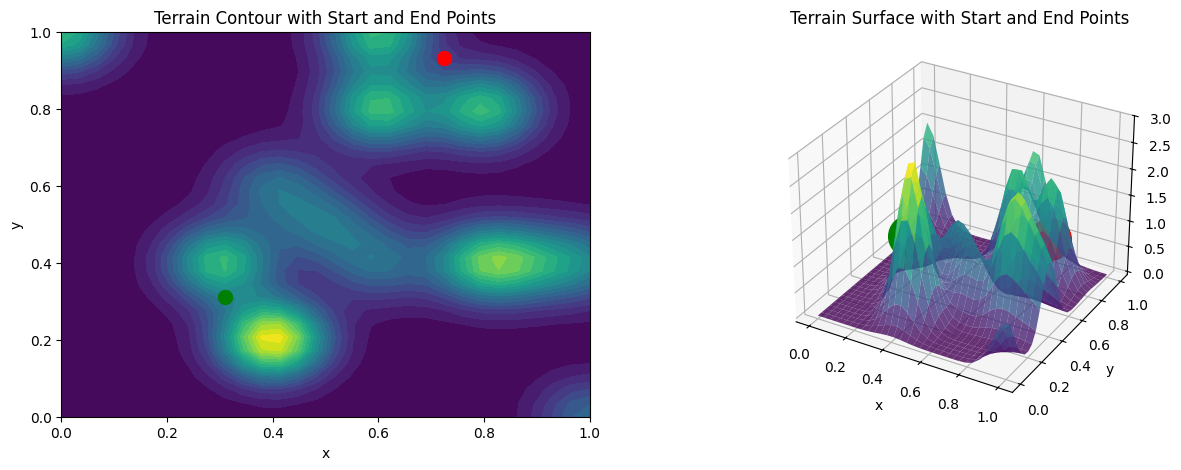

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15, 5))

# Contour plot
plt.subplot(121)
plt.contourf(X, Y, z, 20, cmap='viridis')
plt.plot(x0[0], x0[1], 'go', markersize=10)
plt.plot(xf[0], xf[1], 'ro', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Terrain Contour with Start and End Points')

# 3D surface plot
ax = plt.subplot(122, projection='3d')
ax.plot_surface(X, Y, z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.plot([x0[0]], [x0[1]], [terrain(x0)], 'go', markersize=30)
ax.plot([xf[0]], [xf[1]], [terrain(xf)], 'ro', markersize=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Terrain Surface with Start and End Points')

plt.show()

Para dos celdas adyacentes, la longitud del camino se puede aproximar utilizando la distancia entre los centros de las celdas.

In [25]:
def cost(x0, x1):
    # estimated path length
    s = math.sqrt((x0[0] - x1[0])**2 +  (x0[1] - x1[1])**2 + (terrain(x0) - terrain(x1))**2)
    return s


### Programación dinámica

In [26]:
import copy

# Inicializa en el punto final
i_x_prev = i_xf
i_x = i_x_prev
V = np.zeros((n,n))

V[i_xf[0], i_xf[1]] = 0
live = [i_x]

# Restringe todos los puntos al terreno dado
def in_bounds(i_x):
    return (i_x[0]>=0 and i_x[0]<n and i_x[1]>=0 and i_x[1]<n)

# Define todas las acciones posibles
possible_actions = [
    (1, 0), (-1, 0), #left/right
    (0, 1), (0, -1), #up/down
    (1, 1), (1, -1), (-1, -1), (-1, 1) #NE, SE, SW, NW
]

In [27]:
print(live)

[(21, 27)]


In [28]:
# Procesa todos los movimientos restantes (live nodes)
V_data = []
while len(live) > 0:
    new = set()
    for p in live:
        for a in possible_actions:
            pa = (p[0] - a[0], p[1] - a[1]) # Se usa un menos pues la acción es hacia atrás
            if in_bounds(pa):
                V_new = cost(position(p), position(pa)) + V[p[0], p[1]]
                V_old = V[pa[0], pa[1]]
                if V_old == 0 or V_new < V_old:
                    V[pa[0], pa[1]] = V_new
                    new.add(pa)
    live = new
    V_data.append(copy.copy(V))

In [29]:
# Encuentra el camino óptimo, empieza en las condiciones iniciales
# y elige el costo más bajo hacia adelante,
# utilizando el principio de optimalidad de Bellman
p = i_x0
p_hist_opt = [p]
count = 0
while p != i_xf:
    count += 1
    pa_opt = None
    V_old = V[p[0], p[1]]
    for a in possible_actions:
        pa = (p[0] + a[0], p[1] + a[1])
        if in_bounds(pa):
            V_new = V[pa[0], pa[1]]
            if pa_opt is None or pa==i_xf or (V_new < V_opt and V_new < V_old):
                V_opt = V_new
                pa_opt = pa
        if pa == i_xf: break
    if count > 1000: break
    p = pa_opt
    p_hist_opt.append(p)
pos_hist_opt = np.array([position(p) for p in p_hist_opt])

In [30]:
print(p_hist_opt)

[(9, 9), (10, 9), (11, 10), (12, 11), (12, 12), (12, 13), (11, 14), (10, 15), (9, 16), (9, 17), (9, 18), (10, 19), (11, 20), (12, 20), (13, 20), (14, 20), (15, 19), (16, 19), (17, 18), (18, 18), (19, 18), (20, 18), (21, 18), (22, 18), (23, 18), (24, 18), (25, 18), (26, 19), (27, 20), (28, 21), (28, 22), (27, 23), (27, 24), (26, 25), (26, 26), (25, 27), (24, 27), (23, 27), (22, 27), (21, 27)]


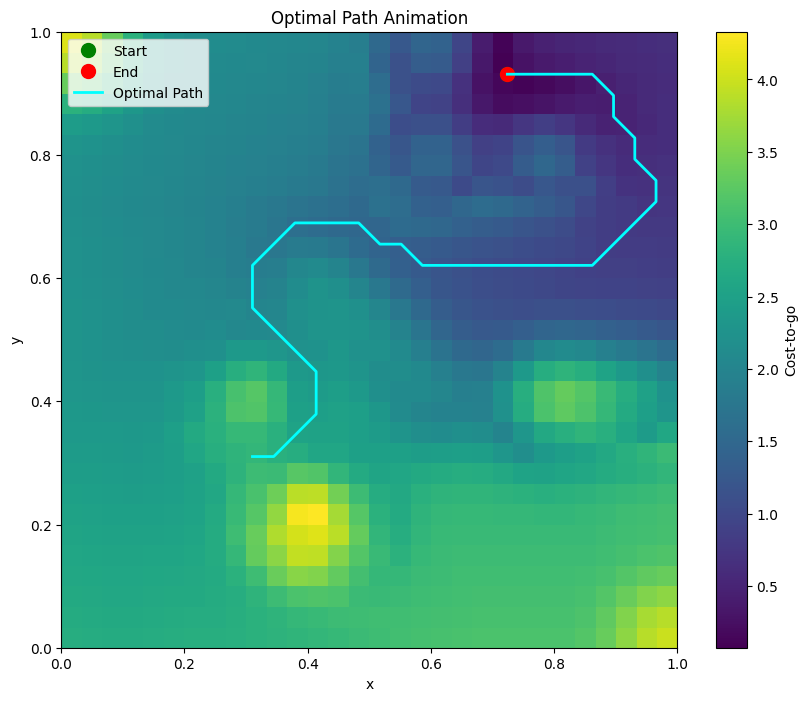

In [31]:
import matplotlib.animation as animation
from IPython.display import HTML

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the cost-to-go graph
im = ax.imshow(V.T, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(im, ax=ax, label='Cost-to-go')

# Plot the starting and ending points
start_point, = ax.plot([], [], 'go', markersize=10, label='Start')
end_point, = ax.plot([], [], 'ro', markersize=10, label='End')

# Plot the optimal path
optimal_path, = ax.plot([], [], color='cyan', linewidth=2, label='Optimal Path')

# Set labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal Path Animation')
ax.legend()

# Initialize animation parameters
num_frames = len(pos_hist_opt)
frames = []

# Define update function for animation
def update(frame):
    # Update the position of the optimal path
    optimal_path.set_data(pos_hist_opt[:frame+1, 0], pos_hist_opt[:frame+1, 1])

    # Update the position of the starting and ending points
    #start_point.set_data(pos_hist_opt[frame, 0], pos_hist_opt[frame, 1])
    #end_point.set_data(pos_hist_opt[-1, 0], pos_hist_opt[-1, 1])
    start_point.set_data([pos_hist_opt[frame, 0]], [pos_hist_opt[frame, 1]])
    end_point.set_data([pos_hist_opt[-1, 0]], [pos_hist_opt[-1, 1]])

    return optimal_path, start_point, end_point

# Generate frames for animation
for i in range(num_frames):
    frames.append(i)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# Display animation in HTML
from IPython.display import HTML
#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())

La intensidad del color representa el costo desde cada punto hasta el punto final.


In [32]:
# Modelo de terreno
def terrain(x):
    peaks = [# center, height, sigma
             ((0.3,0.4), 2, 0.1),
             ((1.0,0.0), 1, 0.1),
             ((0.5,0.5), 1, 0.1),
             ((0.0,1.0), 1, 0.1),
             ((0.6,1.0), 2, 0.1),
             ((0.6,0.8), 2, 0.1),
             ((0.8,0.4), 2, 0.1),
             ((0.8,0.8), 2, 0.1),
             ((0.9,0.4), 1, 0.1),
             ((0.4,0.6), 1, 0.1),
             ((0.6,0.4), 1, 0.1),
             ((1.0,0.4), 1, 0.1),
             ((0.4,0.2), 3, 0.1),
             ((0.0,1.0), 1, 0.1),
             ]
    t = 0
    x = np.array(x)

    for peak in peaks:
        xp = np.array(peak[0]).reshape(2, 1)
        h = peak[1]
        sig = peak[2]
        d = x - np.array(xp)
        t += h * np.exp(-np.sum(d**2, axis=0) / sig**2)
    return t

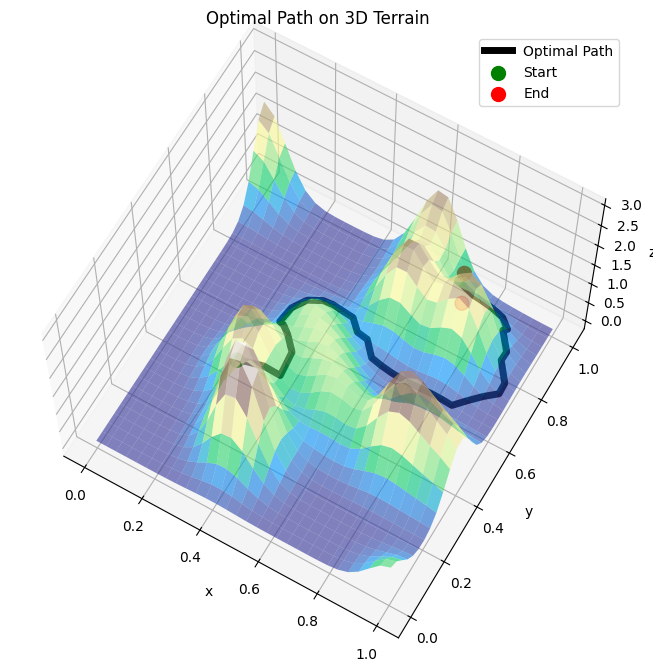

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize figure and axis for 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Adjust viewing angle
ax.view_init(elev=65)

# Plot the terrain surface
h_terrain = ax.plot_surface(X, Y, z, cmap='terrain', alpha=0.6)

# Plot the optimal path on the terrain
ax.plot(pos_hist_opt[:, 0], pos_hist_opt[:, 1], terrain(pos_hist_opt.T), color='black', linewidth=5, label='Optimal Path')

# Plot the starting and ending points
ax.scatter(x0[0], x0[1], terrain(x0), color='green', s=100, label='Start')
ax.scatter(xf[0], xf[1], terrain(xf), color='red', s=100, label='End')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Optimal Path on 3D Terrain')
ax.legend()

plt.show()

### Referencias



*   https://github.com/jgoppert/control-systems/blob/master/Bellman%20Equation.ipynb

